感知机（perceptron）是二分类线性模型，旨在求出将训练数据线性划分的超平面，是判别模型

- [2.1 感知机模型](#2.1-感知机模型)
- [2.2 感知机学习策略](#2.2-感知机学习策略)
    - [2.2.1 数据集的线性可分性](#2.2.1-数据集的线性可分性)
- [2.3 感知机学习算法](#2.3-感知机学习算法)
    - [2.3.1 感知机学习算法的原始形式](#2.3.1-感知机学习算法的原始形式)
    - [2.3.2 算法的收敛性](#2.3.2-算法的收敛性)
    - [2.3.3 感知机学习算法的对偶形式](#2.3.3-感知机学习算法的对偶形式)
- [算法实现](#算法实现)
- [习题](#习题)

# 2.1 感知机模型

感知机是输入空间到输出空间的函数：
$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$
其中输入的特征向量 $x\in \mathcal{X},\mathcal{X} \subseteq \mathbf{R}^{n}$，输出 $y \in \mathcal{Y}, \mathcal{Y} = \{+1, -1\}$。$w$ 和 $b$ 是模型参数。$w \in \mathbf{R}^{n}$ 叫做权值（weight），$b \in \mathbf{R}$ 叫做偏置（bias），$w \cdot x$ 表示二者内积，sign 是符号函数：
$$
\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.
$$
感知机的假设空间是所有线性分类模型或分类器。即函数集 $\{f | f(x)=w \cdot x+b\}$

几何上感知机就是将所有样本数据点一分为二的超平面。$w$ 和 $b$ 分别是平面法向量和截距。

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-13_perceptron.jpg)

# 2.2 感知机学习策略

## 2.2.1 数据集的线性可分性

给定一个数据集 $T$，如果存在超平面：
$$
w \cdot x+b = 0
$$
能将正实例和负实例完全、正确地划分到超平面两侧，即对所有 $y_{i}= +1$ 的实例有$w \cdot x_{i}+b > 0$，对所有 $y_{i}= -1$ 的实例有$w \cdot x_{i}+b < 0$，则称数据集 $T$ 线性可分，否则称数据集 $T$ 线性不可分

## 2.2.2 感知机学习策略

要找出超平面，即确定模型参数 $w$ 和 $b$ ，需要一个策略，即定义（经验）损失函数并使其极小化。

如果选择误分类点的总数，损失函数对 $w$ 和 $b$ 不连续可导。所以选择误分类点到超平面的距离总和。

空间中任一点到超平面的距离为：
$$
\frac{1}{\|w\|}\left|w \cdot x_{0}+b\right|
$$
$\|w\|$ 是 $w$ 的 $L_{2}$ 范数。而对于误分类的点来说，因为预测值和真实值总是相反的，所以有：
$$
-y_{i}\left(w \cdot x_{i}+b\right)>0
$$
因此所有误分类点到超平面的距离总和可以定义为：
$$
-\frac{1}{\|w\|} \sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
$M$ 为误分类的点集。不考虑 $\frac{1}{\|w\|}$，就得到了感知机的损失函数：
$$
L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
正确分类时函数值为0，错误分类时，$L(w,b)$ 是 $w$ 和 $b$ 的线性函数。所以 $L(w,b)$ 关于 $w$ 和 $b$ 连续可导。

# 2.3 感知机学习算法

## 2.3.1 感知机学习算法的原始形式

求解 $w$，$b$ 就是最优化问题：
$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
任意选取一个超平面 $w_{0}$， $b$，采用梯度下降法（stochastic gradient descent）不断地极小化损失函数直到收敛。几何上表示为，起始随意选取一个超平面，然后随机根据一个误分类点调整 $w$ 和 $b$ ，使得超平面向该点靠近，直到越过该点使分类正确。

损失函数 $L(w, b)$ 的梯度由
$$
\begin{array}{c}{\nabla_{w} L(w, b)=-\sum_{x_{i} \in M} y_{i} x_{i}} \\ {\nabla_{b} L(w, b)=-\sum_{x_{i} \in M} y_{i}}\end{array}
$$
给出，随机选取一个误分类点 $(x_{i},y_{i})$，更新 $w$，$b$：
$$
\begin{array}{c}{w \leftarrow w+\eta y_{i} x_{i}} \\ {b \leftarrow b+\eta y_{i}}\end{array}
$$
$\eta$（$0<\eta \leqslant 1$）是步长，也叫学习率(learning rate)，这样不断迭代直到损失为0。

感知机算法的解不唯一，往往存在多个符合条件的超平面，依赖于初始值的选择以及误分类点的选取顺序。

## 2.3.2 算法的收敛性

$w \cdot x+b$ 也可以写成向量内积的形式 $\hat{w} \cdot \hat{x}=w \cdot x+b$，其中 $\hat{w}=\left(w^{\mathrm{T}}, b\right)^{\mathrm{T}}$，$\hat{x}=\left(x^{\mathrm{T}}, 1\right)^{\mathrm{T}}$，这样 $\hat{x} \in \mathbf{R}^{n+1}$,  $\hat{w} \in \mathbf{R}^{n+1}$。有了这个铺垫后，我们有感知机算法原始形式的收敛定理：

**定理：  设训练数据集 $T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$ 线性可分，其中 $x_{i} \in \mathcal{X}=\mathbf{R}^{n}, y_{i} \in \mathcal{Y}=\{-1,+1\}, i=1,2, \cdots, N$ 则：**

1. **存在满足条件 $\left\|\hat{w}_{\mathrm{opt}}\right\|=1$ 的超平面 $\hat{w}_{\mathrm{opt}} \cdot \hat{x}=w_{\mathrm{opt}} \cdot x+b_{\mathrm{opt}}=0$ 将训练数据集完全正确地分开；且存在 $\gamma > 0$，对所有 $i = 1,2,\ldots,N$**

$$
y_{i}\left(\hat{w}_{\mathrm{opt}} \cdot \hat{x}_{i}\right)=y_{i}\left(w_{\mathrm{opt}} \cdot x_{i}+b_{\mathrm{opt}}\right) \geqslant \gamma
$$

2. **令 $R=\max _{1 \leqslant i \leqslant N}\left\|\hat{x}_{i}\right\|$ ，则感知机算法在训练数据集上的误分类次数 $ k$ 满足不等式：**

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

证明：

① 由于数据集线性可分，且超平面能完全正确地分类，假设此超平面为 $\hat{w}_{\mathrm{opt}} \cdot \hat{x}=w_{\mathrm{opt}} \cdot x+b_{\mathrm{opt}}=0$，且 $\left\|\hat{w}_{\mathrm{opt}}\right\|=1$（这样度量点到超平面距离只用考虑 $\left|w \cdot x_{0}+b\right|$ 部分），那么对任意样本均有
$$
y_{i}\left(\hat{w}_{\mathrm{opt}} \cdot \hat{x}_{i}\right)=y_{i}\left(w_{\mathrm{opt}} \cdot x_{i}+b_{\mathrm{opt}}\right) > 0
$$
所以有：
$$
\gamma=\min _{i} \left\{y_{i}\left(w_{\mathrm{opt}} \cdot x_{i}+b_{\mathrm{opt}}\right)\right\}
$$
使
$$
y_{i}\left(\hat{w}_{\mathrm{opt}} \cdot \hat{x}_{i}\right)=y_{i}\left(w_{\mathrm{opt}} \cdot x_{i}+b_{\mathrm{opt}}\right) \geqslant \gamma
$$
② 假设感知机从误分类点  $\hat{w}_{\mathrm{0}}$  开始更新权重。$\hat{w}_{\mathrm{k - 1}}$ 是第 $k$ 个误分类点前的扩充权重向量，即
$$
\hat{w}_{k-1}=\left(w_{k-1}^{\mathrm{T}}, b_{k-1}\right)^{\mathrm{T}}
$$
按照误分类标准，有
$$
y_{i}\left(\hat{w}_{k-1} \cdot \hat{x}_{i}\right)=y_{i}\left(w_{k-1} \cdot x_{i}+b_{k-1}\right) \leqslant 0
$$
其中 $(x_{i},y_{i})$ 是被 $\hat{w}_{k-1}=\left(w_{k-1}^{\mathrm{T}}, b_{k-1}\right)^{\mathrm{T}}$ 误分类的数据，那么权重向量应被更新为
$$
\begin{array}{c}{w_{k} \leftarrow w_{k-1}+\eta y_{i} x_{i}} \\ {b_{k} \leftarrow b_{k-1}+\eta y_{i}}\end{array}
$$
即 $\hat{w}_{k}=\hat{w}_{k-1}+\eta y_{i} \hat{x}_{i}$

我们计算 $\hat{w}_{k} \cdot \hat{w}_{\mathrm{opt}}$，因为上面提到的 $y_{i}\left(\hat{w}_{\mathrm{opt}} \cdot \hat{x}_{i}\right) \geqslant \gamma$ 于是
$$
\begin{aligned} \hat{w}_{k} \cdot \hat{w}_{\mathrm{opt}} &=\hat{w}_{k-1} \cdot \hat{w}_{\mathrm{opt}}+\eta y_{i} \hat{w}_{\mathrm{opt}} \cdot \hat{x}_{i} \\ & \geqslant \hat{w}_{k-1} \cdot \hat{w}_{\mathrm{opt}}+\eta \gamma \end{aligned}
$$
而 $\hat{w}_{k-1}$ 又可以写成 $\hat{w}_{k-1}=\hat{w}_{k-2}+\eta y_{i} \hat{x}_{i}$，由此递推得到
$$
{\hat{w}_{k} \cdot \hat{w}_{\mathrm{opt}} \geqslant \hat{w}_{k-1} \cdot \hat{w}_{\mathrm{opt}}+\eta \gamma \geqslant \hat{w}_{k-2} \cdot \hat{w}_{\mathrm{opt}}+2 \eta \gamma \geqslant \cdots \geqslant k \eta \gamma}
$$
我们求 $\hat{w}_{k}$ 的 $L_{2}$ 范数，因为 被$(x_{i},y_{i})$误分类，所以
$$
\begin{aligned}\left\|\hat{w}_{k}\right\|^{2} &=\left\|\hat{w}_{k-1}\right\|^{2}+2 \eta y_{i} \hat{w}_{k-1} \cdot \hat{x}_{i}+\eta^{2}\left\|\hat{x}_{i}\right\|^{2} \\ & \leqslant\left\|\hat{w}_{k-1}\right\|^{2}+\eta^{2}\left\|\hat{x}_{i}\right\|^{2} \\ & \leqslant\left\|\hat{w}_{k-1}\right\|^{2}+\eta^{2} R^{2} \\ & \leqslant\left\|\hat{w}_{k-2}\right\|^{2}+2 \eta^{2} R^{2} \leqslant \cdots \\ & \leqslant k \eta^{2} R^{2} \end{aligned}
$$
所以有：
$$
\begin{array}{l}{k \eta \gamma \leqslant \hat{w}_{k} \cdot \hat{w}_{\mathrm{opt}} \leqslant\left\|\hat{w}_{k}\right\|\left\|\hat{w}_{\mathrm{opt}}\right\| \leqslant \sqrt{k} \eta R} \\ {k^{2} \gamma^{2} \leqslant k R^{2}} \\ k \leqslant\left(\frac{R}{\gamma}\right)^{2} \end{array}
$$

## 2.3.3 感知机学习算法的对偶形式

感知机在误分类点 $(x_{i},y_{i})$ 更新参数时的计算方法为：
$$
\begin{array}{c}{w \leftarrow w+\eta y_{i} x_{i}} \\ {b \leftarrow b+\eta y_{i}}\end{array}
$$
假设从起点 $w_{0},b_{0}$ 开始，修改 $n$ 次后，两参数的增量分别为 $\alpha_{i}y_{i} x_{i}$，$\alpha_{i}y_{i}$，这里 $\alpha_{i} = n_{i}\eta$，所以最终学到的 $w$ 和 $b$ 可以表示为：
$$
\begin{aligned} w &=\sum_{i=1}^{N} \alpha_{i} y_{i} x_{i} \\ b &=\sum_{i=1}^{N} \alpha_{i} y_{i} \end{aligned}
$$
当 $\eta = 1$ 时，$\alpha_{i}$ 表示为第 $i$ 个实例由于误分类而进行更新的次数。

所以评判标准变为，如果 $y_{i}\left(\sum_{j=1}^{N} \alpha_{j} y_{j} x_{j} \cdot x_{i}+b\right) \leqslant 0$，那么
$$
\begin{array}{l}{\alpha_{i} \leftarrow \alpha_{i}+\eta} \\ {b \leftarrow b+\eta y_{i}}\end{array}
$$
评判式里的实例仅以内积形式出现，可以预先算好存在一个矩阵里，这就是 Gram 矩阵（Gram matrix）
$$
\mathbf{G}=\left[x_{i} \cdot x_{j}\right]_{N \times N}
$$
与原始形式一样，对偶形式也是收敛的，存在多个解。

# 算法实现

**导入需要的库**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**版本与硬件信息**

In [2]:
%load_ext watermark
%watermark -v -m -p ipywidgets,matplotlib,numpy,pandas,sklearn

CPython 3.6.9
IPython 7.7.0

ipywidgets 7.5.1
matplotlib 2.1.2
numpy 1.16.4
pandas 0.25.0
sklearn 0.21.2

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


**加载数据**

数据为某次测试的学生成绩，数据格式为 $[score_1,socre_2,pass]$，成绩为百分制，$pass$ 为 1 表示通过，为 0 表示未通过

In [3]:
file_path = '../data/2.perceptron/data.txt'
raw_data = np.loadtxt(file_path, delimiter=',')
raw_data[0:6, :]

array([[99.8278578 , 72.36925193,  1.        ],
       [99.31500881, 68.77540947,  1.        ],
       [99.27252693, 60.999031  ,  1.        ],
       [33.91550011, 93.86943574,  0.        ],
       [97.64563396, 68.86157272,  1.        ],
       [94.83450672, 41.6943068 ,  1.        ]])

In [4]:
df = pd.DataFrame(raw_data, columns=['Exam 1 score', 'Exam 2 score', 'Pass'])
df.head()

,Exam 1 score,Exam 2 score,Pass
0,99.827858,72.369252,1.0
1,99.315009,68.775409,1.0
2,99.272527,60.999031,1.0
3,33.915500,93.869436,0.0
4,97.645634,68.861573,1.0


**查看数据**

主要看看数据规模和数据分布情况

In [5]:
df.shape

(89, 3)

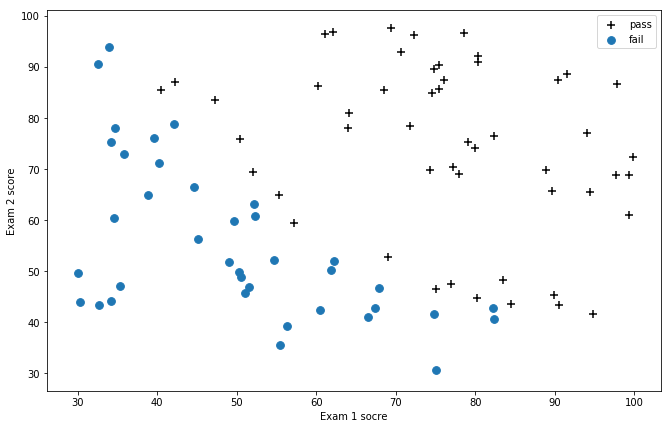

In [6]:
plt.figure(figsize=(11,7))
plt.scatter(df.loc[df['Pass'] == 1, 'Exam 1 score'], df.loc[df['Pass'] == 1, 'Exam 2 score'], marker='+',s=60, c='k', label='pass')
plt.scatter(df.loc[df['Pass'] == 0, 'Exam 1 score'], df.loc[df['Pass'] == 0, 'Exam 2 score'],s=60, label='fail')
plt.xlabel('Exam 1 socre')
plt.ylabel('Exam 2 score')
plt.legend()

**数据处理**

简单处理一下数据，使其线性可分

In [7]:
data = []
for item in raw_data:
    x1, x2, y = item
    if x1 >= 60 and x2 >= 60:  #  都大于 60 分才算通过
        y = 1
    else:
        y = 0
    data.append([x1,x2,y])
data = np.array(data)
df = pd.DataFrame(data, columns=['Exam 1 score', 'Exam 2 score', 'Pass'])

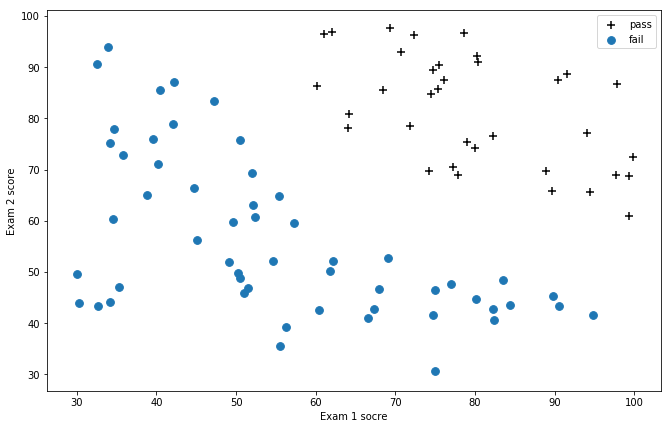

In [8]:
plt.figure(figsize=(11,7))
plt.scatter(df.loc[df['Pass'] == 1, 'Exam 1 score'], df.loc[df['Pass'] == 1, 'Exam 2 score'], marker='+',s=60, c='k', label='pass')
plt.scatter(df.loc[df['Pass'] == 0, 'Exam 1 score'], df.loc[df['Pass'] == 0, 'Exam 2 score'],s=60, label='fail')
plt.xlabel('Exam 1 socre')
plt.ylabel('Exam 2 score')
plt.legend()

**准备数聚集**

原始数据标签里，负类用 0 标记，为了参与运算改为 -1

In [9]:
X, Y = np.array(df[['Exam 1 score','Exam 2 score']]),df['Pass']

In [10]:
Y = np.array([1 if i == 1 else -1 for i in Y])

**算法实现**

使用一元一次函数进行二分类

In [11]:
class Perceptron_self(object):
    def __init__(self):
        self.w = np.ones(df.shape[1] - 1, dtype=np.float32)
        self.b = 0
        self.eta = 0.1
        
    def sign(self, x, w, b):
        y = np.dot(x,w) + b
        return y
    
    def fit(self, X, Y):
        while True:
            count = 0
            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.eta * np.dot(x,y)
                    self.b = self.b + self.eta * y
                    count += 1
            if count == 0:
                return 'Finish'


**训练模型**

In [12]:
perc = Perceptron_self()
perc.fit(X, Y)

'Finish'

In [13]:
perc.w

array([1.57648766, 1.92239325])

In [14]:
perc.b

-236.59999999999084

**查看效果**

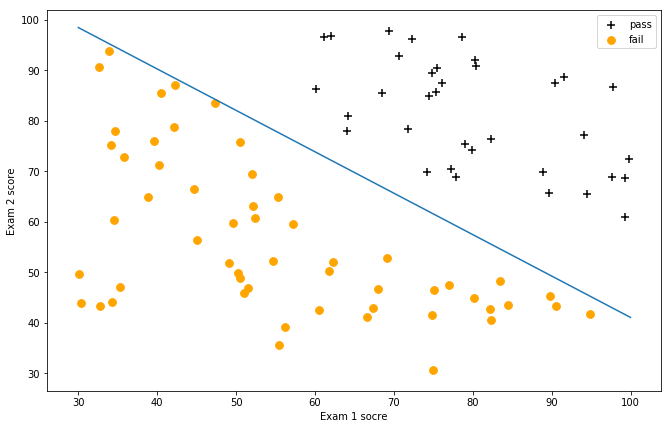

In [15]:
sample = np.linspace(30, 100, 10)

y_pred = -(perc.w[0] * sample + perc.b) / perc.w[1]

plt.figure(figsize=(11,7))
plt.plot(sample, y_pred)
plt.scatter(df.loc[df['Pass'] == 1, 'Exam 1 score'], df.loc[df['Pass'] == 1, 'Exam 2 score'], marker='+',s=60, c='k', label='pass')
plt.scatter(df.loc[df['Pass'] == 0, 'Exam 1 score'], df.loc[df['Pass'] == 0, 'Exam 2 score'],s=60, c='orange', label='fail')
plt.xlabel('Exam 1 socre')
plt.ylabel('Exam 2 score')
plt.legend()

### scikit-learn

[scikit-learn](https://scikit-learn.org/) 是一个成熟的 python 数据科学库，有大量的统计方法实现，比如[感知机](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [16]:
from sklearn.linear_model import Perceptron

In [17]:
perc = Perceptron(max_iter=1000,eta0=0.03)
perc.fit(X,Y)
print ("Accuracy: " + str(perc.score(X, Y)*100) + "%")

Accuracy: 60.67415730337079%


**各个特征的权重**

In [18]:
perc.coef_

array([[-0.35122218, -0.66691038]])

**截距**

In [19]:
perc.intercept_

array([-4.23])

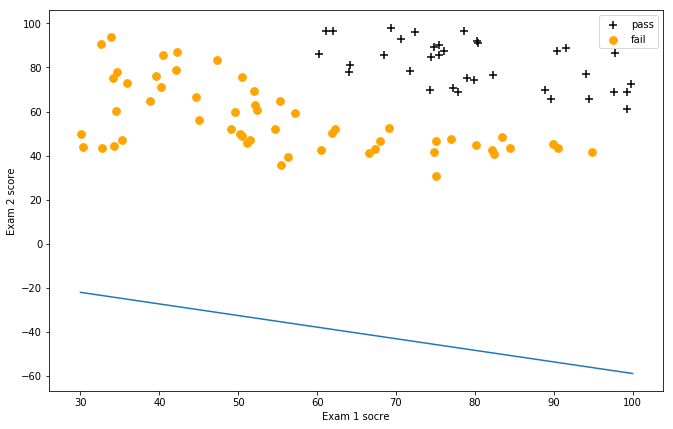

In [20]:
sample = np.linspace(30, 100, 10)

y_pred = -(perc.coef_[0][0] * sample + perc.intercept_) / perc.coef_[0][1]

plt.figure(figsize=(11,7))
plt.plot(sample, y_pred)
plt.scatter(df.loc[df['Pass'] == 1, 'Exam 1 score'], df.loc[df['Pass'] == 1, 'Exam 2 score'], marker='+',s=60, c='k', label='pass')
plt.scatter(df.loc[df['Pass'] == 0, 'Exam 1 score'], df.loc[df['Pass'] == 0, 'Exam 2 score'],s=60, c='orange', label='fail')
plt.xlabel('Exam 1 socre')
plt.ylabel('Exam 2 score')
plt.legend()

# 习题

**2.1 验证感知机为什么不能表示异或**

解：

异或(XOR)逻辑为

| a    | b    | y    |
| ---- | ---- | ---- |
| 0    | 0    | -1   |
| 1    | 0    | 1    |
| 0    | 1    | 1    |
| 1    | 1    | -1   |

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-15_xor.jpg)

取 $x_{i} = (a_{i},b_{i})^{T}$ 如果全部分类正确，超平面需要满足：
$$
\left\{\begin{array}{l}{\mathrm{w} \cdot x_{1}+\mathrm{d}<0} \\ {\mathrm{w} \cdot x_{2}+\mathrm{d}>0} \\ {\mathrm{w} \cdot x_{3}+\mathrm{d}>0} \\ {\mathrm{w} \cdot x_{4}+\mathrm{d}<0}\end{array}\right.
$$
假定 $w=(u,v)^T$ ,则上式简化为：
$$
\left\{\begin{array}{c}{d<0} \\ {u+d>0} \\ {v+d>0} \\ {u+v+d<0}\end{array}\right.
$$
无解，也即在图中找不到一条能线性划分两类点的直线。所以感知机不能表示异或

**2.2 模仿例题2.1，构建从训练数据集求感知机模型的例子**

参见算法实现部分

**2.3 证明以下定理：样本集线性可分的充分必要条件是正实例点集和负实例点集所构成的凸壳互不相交**

凸壳定义：设集合 $S \subset \mathbf{R}^{n}$ 是由 $\mathbf{R}^{n}$ 中的 $k$ 个点所组成的集合，即 $S=\left\{x_{1}, x_{2}, \cdots, x_{k}\right\}$，定义 $S$ 的凸壳 conv(S) 为
$$
\operatorname{conv}(S)=\left\{x=\sum_{i=1}^{k} \lambda_{i} x_{i} | \sum_{i=1}^{k} \lambda_{i}=1, \lambda_{i} \geqslant 0, i=1,2, \cdots, k\right\}
$$

在二维欧几里得空间中，凸包(凸壳)可想象为一条刚好包着所有点的橡皮圈。

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-15_convex_hull.jpg)

**充分性：**

取空间中任意两点 $x$，$y$ 的距离为欧几里得距离，即 $\| x - y \|_{2} = \sqrt{\left(x-y\right) \cdot\left(x-y\right)}$ 记作 $d(x,y)$。定位两个凸包间的距离
$$
d(S_{1}, S_{2}) = \min \{d(x,y)|x \in S_1,y\in S_{2}\}
$$
令正实例点集为 $S_{x}$，负实例点集为 $S_{y}$，二者间距离为 $d(x_{min}, y_{min})$。因为 $S_{x}$ 和 $S_{y}$ 不相交，取 $S_{x}$ 内任一点 $x$，记点 $x$ 指向 $x_{min}$ 的向量为 $(x,x_{min})$，有 $(x,x_{min})+(x_{min}, y_{min}) = (x,y_{min})$ ，则有  $d(x,x_{min}) \leqslant d(x,y_{min})$，同理对任意 $S_{y}$ 内的点 $y$ ，有 $d(y,y_{min}) \leqslant d(y,x_{min})$

构造超平面 $w \cdot a + b = 0$，其中
$$
w = x_{min} - y_{min}\\
b = -\frac{x_{min} \cdot x_{min} - y_{min} \cdot y_{min}}{2}
$$
则
$$
\begin{aligned}
w \cdot a + b &= \left(x_{min}-y_{min}\right) \cdot a-\frac{x_{min} \cdot x_{min}-y_{min} \cdot y_{min}}{2} \\
&=x_{min} \cdot a - y_{min} \cdot a - \frac{x_{min} \cdot x_{min}-y_{min} \cdot y_{min}}{2} \\
&= \frac{2x_{min} \cdot a - 2y_{min} \cdot a - x_{min} \cdot x_{min}+y_{min} \cdot y_{min} + a\cdot a - a\cdot a}{2}\\
&= \frac{\|a - y_{min}\|_{2}^{2} - \|a - x_{min}\|_{2}^{2}}{2} \\
&= \frac{d^{2}(a,y_{min}) - d^{2}(a,x_{min})}{2}
\end{aligned}
$$
于是，对 $\forall x \in S_{x}$，有 $w \cdot x + b > 0$，对 $\forall y \in S_{y}$，有 $w \cdot y + b < 0$，所以 $S_{x}$ 与 $S_{y}$ 线性可分

**必要性：**

当样本集线性可分，超平面为 $w \cdot a + b = 0$，正实例点集为 $X$, 其凸包为 $S_{x}$，负实例点集为 $Y$，其凸包为 $S_{y}$。于是对正实例点集中任意一点有：
$$
w \cdot x_{i}+b>0
$$
进而对于 $S_{x}$
$$
\begin{aligned} w \cdot x+b &=w \cdot\left(\Sigma_{i=1}^{k} \lambda_{i} x_{i}\right)+\left(\Sigma_{i=1}^{k} \lambda_{i}\right) \cdot b \\ &=\Sigma_{i=1}^{k} \lambda_{i} w_{i} x_{i}+\left(\Sigma_{i=1}^{k} \lambda_{i}\right) \cdot b \\ &=\Sigma_{i=1}^{k} \lambda_{i}\left(w_{i} x_{i}+b\right)>0 \end{aligned}
$$
同理可证，对 $S_{y}$ 有 $\Sigma_{i=1}^{k} \lambda_{i}\left(w_{i} y_{i}+b\right)<0$，所以正实例点集与负实例点集互不相交

---

**作者：** Daniel Meng

**GitHub：**[LibertyDream](https://github.com/LibertyDream)

**博客：**[明月轩](https://LIbertydream.github.io)